# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [82]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import datetime
from pandas.tseries.frequencies import to_offset

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [83]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [84]:
#  1. Get the total rides for each city type
ride_counts  = pyber_data_df.groupby(['type']).count()['ride_id']
rural_ride_count = ride_counts.loc['Rural']
suburban_ride_count = ride_counts.loc['Suburban']
urban_ride_count = ride_counts.loc['Urban']
ride_counts

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [85]:
# 2. Get the total drivers for each city type
driver_count  = city_data_df.groupby(['type']).sum()['driver_count']
rural_driver_count = driver_count.loc['Rural']
suburban_driver_count = driver_count.loc['Suburban']
urban_driver_count = driver_count.loc['Urban']

driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [86]:
#  3. Get the total amount of fares for each city type
total_fare  = pyber_data_df.groupby(['type']).sum()['fare']
rural_total_fare = total_fare.loc['Rural']
suburban_total_fare = total_fare.loc['Suburban']
urban_total_fare = total_fare.loc['Urban']

total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [87]:
#  4. Get the average fare per ride for each city type. 
rural_avg_fare_per_ride = rural_total_fare / rural_ride_count
suburban_avg_fare_per_ride = suburban_total_fare / suburban_ride_count
urban_avg_fare_per_ride = urban_total_fare / urban_ride_count

print(rural_avg_fare_per_ride, suburban_avg_fare_per_ride, urban_avg_fare_per_ride)

34.62344 30.970128000000003 24.525772307692307


In [88]:
# 5. Get the average fare per driver for each city type. 
urban_avg_fare_per_driver = urban_total_fare / urban_driver_count
suburban_avg_fare_per_driver = suburban_total_fare / suburban_driver_count
rural_avg_fare_per_driver = rural_total_fare / rural_driver_count

print(rural_avg_fare_per_driver, suburban_avg_fare_per_driver, urban_avg_fare_per_driver)

55.48628205128205 39.50271428571429 16.571467775467774


In [89]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary = {'Total Rides': [rural_ride_count, suburban_ride_count, urban_ride_count], 
                 'Total Drivers': [rural_driver_count, suburban_driver_count, urban_driver_count], 
                 'Total Fares': [rural_total_fare, suburban_total_fare, urban_total_fare], 
                 'Average Fare per Ride': [rural_avg_fare_per_ride, suburban_avg_fare_per_ride, urban_avg_fare_per_ride], 
                 'Average Fare per Driver': [rural_avg_fare_per_driver, suburban_avg_fare_per_driver, urban_avg_fare_per_driver]}

pyber_summary_df = pd.DataFrame(pyber_summary, index=['Rural', 'Suburban', 'Urban'])
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [90]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [91]:
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [92]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [93]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [94]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_per_day = pyber_data_df.groupby(['type', 'date']).sum()['fare']
fare_per_day

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [95]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_per_day = fare_per_day.reset_index()
fare_per_day

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [96]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_per_day_pivot = fare_per_day.pivot(index='date', columns='type', values='fare')
fare_per_day_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [102]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
fare_per_day_jan_to_april = fare_per_day_pivot.loc['2019-01-01':'2019-04-28']
fare_per_day_jan_to_april

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [103]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_per_day_jan_to_april.index = pd.to_datetime(fare_per_day_jan_to_april.index)

In [104]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_per_day_jan_to_april.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [131]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_per_day_jan_to_april_weeks = fare_per_day_jan_to_april.resample('W', label='left').sum()
fare_per_day_jan_to_april_weeks

type,Rural,Suburban,Urban
date,,,
2018-12-30,187.92,721.60,1661.68
2019-01-06,67.65,1105.13,2050.43
2019-01-13,306.00,1218.20,1939.02
2019-01-20,179.69,1203.28,2129.51
2019-01-27,333.08,1042.79,2086.94
2019-02-03,115.80,974.34,2162.64
2019-02-10,95.82,1045.50,2235.07
2019-02-17,419.06,1412.74,2466.29
2019-02-24,175.14,858.46,2218.20


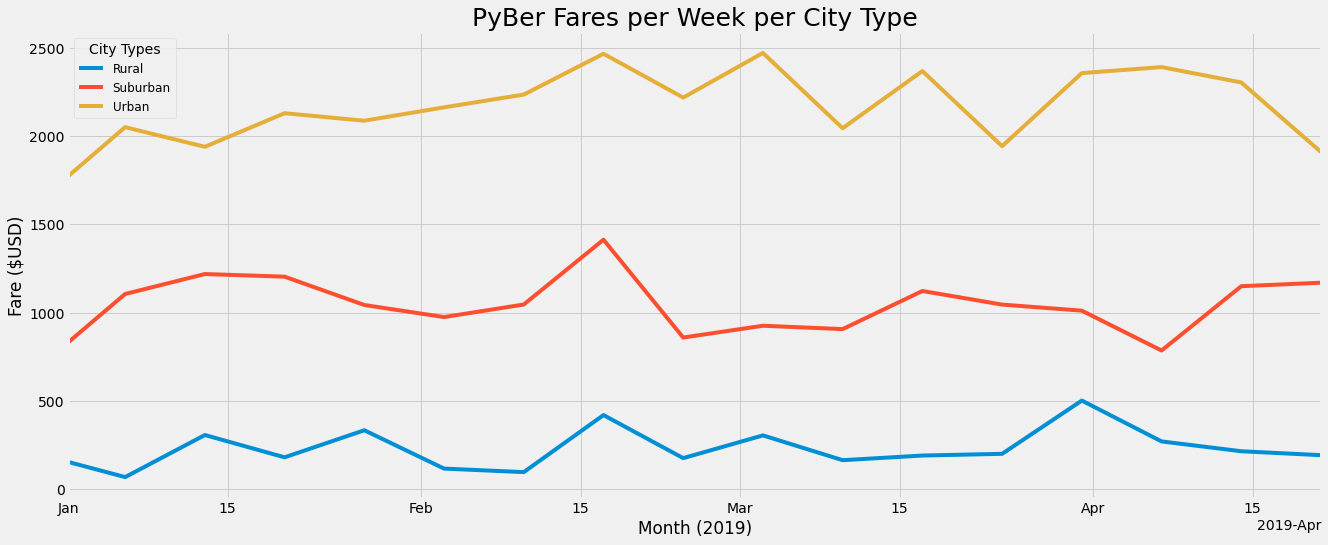

In [134]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(fare_per_day_jan_to_april_weeks.index, fare_per_day_jan_to_april_weeks)

#Set major ticks for each month
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator))
ax.xaxis.set_minor_locator(mdates.DayLocator(15))

#Set x-axis limits by date
plt.xlim([datetime.date(2019, 1, 1), datetime.date(2019, 4, 21)])

#Show minor locator grid
ax.xaxis.grid(True, which='minor')

#Format the graph
plt.title('PyBer Fares per Week per City Type', fontsize=25)
plt.ylabel('Fare ($USD)')
plt.xlabel('Month (2019)')

plt.legend(fare_per_day_jan_to_april_weeks, fontsize='12', mode='Expanded', 
           loc='upper left', title='City Types')

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#Save the figure
plt.savefig('Analysis/PyBer Fares per Week per City Type Fig.png')

# Show the plot
plt.show()